### K - Prototype Clustering

In [1]:
!pip install kmodes

In [1]:
import numpy as np
import pandas as pd
from kmodes.kprototypes import KPrototypes

In [2]:
import json
import pandas as pd
from collections import defaultdict
from typing import Dict, Any
import hashlib

In [3]:
with open('anomalies.dump', 'r') as f:
    data = json.load(f)

In [4]:
df = pd.DataFrame(data)

In [5]:
df.head()

__id                                        algo_params  \
0     0  {'histogram': {'Histogram Bin Counts': [3, 5, ...   
1     1  {'histogram': {'Histogram Bin Counts': [4, 7, ...   
2     2  {'histogram': {'Histogram Bin Counts': [20, 24...   
3     3  {'histogram': {'Histogram Bin Counts': [9, 8, ...   
4     4  {'histogram': {'Histogram Bin Counts': [2, 3, ...   

                                          call_stack  \
0  [{'entry': 1648661826572801, 'event_id': '392:...   
1  [{'entry': 1648661820195145, 'event_id': '392:...   
2  [{'entry': 1648661820195024, 'event_id': '392:...   
3  [{'entry': 1648661820200575, 'event_id': '392:...   
4  [{'entry': 1648661820396855, 'event_id': '392:...   

                                      counter_events             entry  \
0                                                 []  1648661826572801   
1                                                 []  1648661820195145   
2                                                 []  1648661820195024   
3                                                 []  1648661820200575   
4  [{'counter_idx': 0, 'counter_name': 'Message s...  1648661820396855   

   event_id                                       event_window  \
0  392:0:46  {'comm_window': [], 'exec_window': [{'entry': ...   
1   392:0:5  {'comm_window': [], 'exec_window': [{'entry': ...   
2   392:0:1  {'comm_window': [], 'exec_window': [{'entry': ...   
3   392:0:7  {'comm_window': [], 'exec_window': [{'entry': ...   
4  392:0:43  {'comm_window': [], 'exec_window': [{'entry': ...   

               exit  fid                      func  ...      io_step_tend  \
0  1648661826572842   13            pthread_create  ...  1648661820195197   
1  1648661820195152  334           MPI_Comm_size()  ...  1648661820195197   
2  1648661820195033  223           MPI_Comm_rank()  ...  1648661820195197   
3  1648661820200593  445  MPI_Get_processor_name()  ...  1648661820195197   
4  1648661820396921  594               MPI_Bcast()  ...  1648661820195197   

     io_step_tstart is_gpu_event  outlier_score  outlier_severity  pid  rid  \
0  1648661810277490        False       2.000000                41    0  392   
1  1648661810277490        False       4.169925                 7    0  392   
2  1648661810277490        False       3.584963                 9    0  392   
3  1648661810277490        False     100.000111                18    0  392   
4  1648661810277490        False       3.584963                66    0  392   

   runtime_exclusive  runtime_total  tid  
0                 41             41    0  
1                  7              7    0  
2                  9              9    0  
3                 18             18    0  
4                 66             66    0  

[5 rows x 24 columns]

In [9]:
maggie=df['call_stack']


In [11]:
import collections
collections.Counter('maggie')

Counter({'m': 1, 'a': 1, 'g': 2, 'i': 1, 'e': 1})

In [7]:
#We define the function to 

def dict_hash(dictionary: Dict[str, Any]) -> str:
    """MD5 hash of a dictionary."""
    dhash = hashlib.md5()
    # We need to sort arguments so {'a': 1, 'b': 2} is
    # the same as {'b': 2, 'a': 1}
    encoded = json.dumps(dictionary, sort_keys=True).encode()
    dhash.update(encoded)
    return dhash.hexdigest()

In [8]:
func_id=[]
entry=[]
exit=[]
io_step_tend=[]
io_step_tstart=[]
is_gpu_event=[]
outlier_score=[]
outlier_severity=[]
func_hash=[]
call_stack_func=[]
func=[]
rid=[]
__id=[]
tid=[]
for i in range(50226):
    res = defaultdict(list)
    for sub in (df['call_stack'][i]):
        for key in sub:
            res[key].append(sub[key])
    #print(i,dict_hash(res['func']))
    call_stack_func.append(res['func'])
    func_id.append(df['__id'][i])
    func_hash.append(dict_hash(res['func']))
    func.append(df['func'][i])
    rid.append(df['rid'][i])
    entry.append(df['entry'][i])
    exit.append(df['exit'][i])
    io_step_tend.append(df['io_step_tend'][i])
    io_step_tstart.append(df['io_step_tstart'][i])
    is_gpu_event.append(df['is_gpu_event'][i])
    outlier_score.append(df['outlier_score'][i])
    outlier_severity.append(df['outlier_severity'][i])
    __id.append(df['__id'][i])
    tid.append(df['tid'][i])
    
    

In [9]:
df1 = zip(__id,entry,exit,io_step_tend, io_step_tstart,is_gpu_event, outlier_score, outlier_severity,rid,tid,func_hash,call_stack_func,func,func_id)
#df1 = pd.DataFrame(func_df, columns = ['__id','entry','exit','io_step_tend', 'io_step_tstart','is_gpu_event', 'outlier_score', 'outlier_severity','rid','tid','hash_func','call_stack_func','func','func_id]

In [10]:
df1 = pd.DataFrame(df1, columns = ['__id','entry','exit','io_step_tend', 'io_step_tstart','is_gpu_event', 'outlier_score', 'outlier_severity','rid','tid','hash_func','call_stack_func','func','func_id'])

In [11]:
#df1 =df1.drop('__id', axis =1)

In [12]:
df1.head()

__id             entry              exit      io_step_tend  \
0     0  1648661826572801  1648661826572842  1648661820195197   
1     1  1648661820195145  1648661820195152  1648661820195197   
2     2  1648661820195024  1648661820195033  1648661820195197   
3     3  1648661820200575  1648661820200593  1648661820195197   
4     4  1648661820396855  1648661820396921  1648661820195197   

     io_step_tstart  is_gpu_event  outlier_score  outlier_severity  rid  tid  \
0  1648661810277490         False       2.000000                41  392    0   
1  1648661810277490         False       4.169925                 7  392    0   
2  1648661810277490         False       3.584963                 9  392    0   
3  1648661810277490         False     100.000111                18  392    0   
4  1648661810277490         False       3.584963                66  392    0   

                          hash_func  \
0  eed8c4ea90b205288aae6e82c49c7392   
1  731c389ef63cdc69848c29f9b0f45231   
2  7c747741648f2c536cb8ecde94f3b768   
3  e802aac4e376612efae9bfe6e12c6ec5   
4  717dfbe571f28fdd5a07f67efdeaaf35   

                                     call_stack_func  \
0  [pthread_create, OpenMP_Parallel_Region _ZN6Ko...   
1            [MPI_Comm_size(), OpenMP_Implicit_Task]   
2            [MPI_Comm_rank(), OpenMP_Implicit_Task]   
3   [MPI_Get_processor_name(), OpenMP_Implicit_Task]   
4                [MPI_Bcast(), OpenMP_Implicit_Task]   

                       func  func_id  
0            pthread_create        0  
1           MPI_Comm_size()        1  
2           MPI_Comm_rank()        2  
3  MPI_Get_processor_name()        3  
4               MPI_Bcast()        4

In [13]:
df1 = df1.drop('call_stack_func', axis =1)

In [14]:
df1.head()

__id             entry              exit      io_step_tend  \
0     0  1648661826572801  1648661826572842  1648661820195197   
1     1  1648661820195145  1648661820195152  1648661820195197   
2     2  1648661820195024  1648661820195033  1648661820195197   
3     3  1648661820200575  1648661820200593  1648661820195197   
4     4  1648661820396855  1648661820396921  1648661820195197   

     io_step_tstart  is_gpu_event  outlier_score  outlier_severity  rid  tid  \
0  1648661810277490         False       2.000000                41  392    0   
1  1648661810277490         False       4.169925                 7  392    0   
2  1648661810277490         False       3.584963                 9  392    0   
3  1648661810277490         False     100.000111                18  392    0   
4  1648661810277490         False       3.584963                66  392    0   

                          hash_func                      func  func_id  
0  eed8c4ea90b205288aae6e82c49c7392            pthread_create        0  
1  731c389ef63cdc69848c29f9b0f45231           MPI_Comm_size()        1  
2  7c747741648f2c536cb8ecde94f3b768           MPI_Comm_rank()        2  
3  e802aac4e376612efae9bfe6e12c6ec5  MPI_Get_processor_name()        3  
4  717dfbe571f28fdd5a07f67efdeaaf35               MPI_Bcast()        4

In [81]:
#df1 = df1.drop('__id', axis =1)
#df1 = df1.drop('cluster', axis =1)
df1 = df1.drop('func_id', axis =1)
df1.head()

entry              exit      io_step_tend    io_step_tstart  \
0  1648661826572801  1648661826572842  1648661820195197  1648661810277490   
1  1648661820195145  1648661820195152  1648661820195197  1648661810277490   
2  1648661820195024  1648661820195033  1648661820195197  1648661810277490   
3  1648661820200575  1648661820200593  1648661820195197  1648661810277490   
4  1648661820396855  1648661820396921  1648661820195197  1648661810277490   

  is_gpu_event  outlier_score  outlier_severity  rid  tid  \
0        False              2                41  392    0   
1        False              4                 7  392    0   
2        False              3                 9  392    0   
3        False            100                18  392    0   
4        False              3                66  392    0   

                          hash_func                      func  
0  eed8c4ea90b205288aae6e82c49c7392            pthread_create  
1  731c389ef63cdc69848c29f9b0f45231           MPI_Comm_size()  
2  7c747741648f2c536cb8ecde94f3b768           MPI_Comm_rank()  
3  e802aac4e376612efae9bfe6e12c6ec5  MPI_Get_processor_name()  
4  717dfbe571f28fdd5a07f67efdeaaf35               MPI_Bcast()

In [75]:
df_array = df1.values

In [82]:

df_array[:,5] = df_array[:,5].astype(float)
df_array[:,7] = df_array[:,6].astype(float)
df_array[:,8] = df_array[:,7].astype(float)
df_array[:,9] = df_array[:,8].astype(float)



In [17]:
kproto = KPrototypes(n_clusters=6, verbose=2, max_iter=20)
clusters = kproto.fit_predict(df_array, categorical=[1,2,3,5,10,11,4]

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initia

Run: 7, iteration: 2/20, moves: 581, ncost: 3.9267440069501885e+20
Run: 7, iteration: 3/20, moves: 264, ncost: 3.9225531714671654e+20
Run: 7, iteration: 4/20, moves: 92, ncost: 3.922016774081887e+20
Run: 7, iteration: 5/20, moves: 36, ncost: 3.921942494081501e+20
Run: 7, iteration: 6/20, moves: 26, ncost: 3.9218939784567246e+20
Run: 7, iteration: 7/20, moves: 19, ncost: 3.921867436784039e+20
Run: 7, iteration: 8/20, moves: 8, ncost: 3.921863032073945e+20
Run: 7, iteration: 9/20, moves: 3, ncost: 3.921862054252481e+20
Run: 7, iteration: 10/20, moves: 9, ncost: 3.921856458295305e+20
Run: 7, iteration: 11/20, moves: 11, ncost: 3.921841669894307e+20
Run: 7, iteration: 12/20, moves: 18, ncost: 3.921818824743432e+20
Run: 7, iteration: 13/20, moves: 16, ncost: 3.9218065347283386e+20
Run: 7, iteration: 14/20, moves: 7, ncost: 3.921803867520991e+20
Run: 7, iteration: 15/20, moves: 2, ncost: 3.921803667214448e+20
Run: 7, iteration: 16/20, moves: 1, ncost: 3.9218034728908554e+20
Run: 7, iteration

In [18]:
#print(kproto.cluster_centroids_)

[['6203.171285779191' '1648662708790893.8' '1648662714145713.8'
  '1648662719304387.8' '1648662717043655.8' '57.52461809113577'
  '321389.50249886414' '277.96047251249433' '2.833711949114039'
  '6203.171285779191' 'False' '1660d5f3d0d958e0038e98114df40e7b'
  'KernelExecution void Kokkos::Experimental::Impl::hip_parallel_launch_local_memory<Kokkos::Impl::ParallelFor<templated_push<(KinType)1>(int, bool, Simulation<Kokkos::Device<Kokkos::Experimental::HIP, Kokkos::Experimental::HIPSpace> > const&, Grid<Kokkos::Device<Kokkos::Experimental::HIP, Kokkos::Experimental::HIPSpace> > const&, MagneticField<Kokkos::Device<Kokkos::Experimental::HIP, Kokkos::Experimental::HIPSpace> > const&, Species<Kokkos::Device<Kokkos::Experimental::HIP, Kokkos::Experimental::HIPSpace> > const&, TmpSpecies<Kokkos::Device<Kokkos::Experimental::HIP, Kokkos::Experimental::HIPSpace> > const&, ElectricField<Kokkos::Device<Kokkos::Experimental::HIP, Kokkos::Experimental::HIPSpace> > const&, PerturbedBField<Kokkos::Dev

In [19]:
cluster_dict =[]
for c in clusters:
    cluster_dict.append(c)

In [20]:
#cluster_dict

In [21]:
df1['cluster'] =cluster_dict

In [33]:
df1.head(10)

__id             entry              exit      io_step_tend  \
0     0  1648661826572801  1648661826572842  1648661820195197   
1     1  1648661820195145  1648661820195152  1648661820195197   
2     2  1648661820195024  1648661820195033  1648661820195197   
3     3  1648661820200575  1648661820200593  1648661820195197   
4     4  1648661820396855  1648661820396921  1648661820195197   
5     5  1648661820385771  1648661820387602  1648661820195197   
6     6  1648661826656015  1648661826656056  1648661820351449   
7     7  1648661820337918  1648661820337926  1648661820351449   
8     8  1648661820390697  1648661820390707  1648661820351449   
9     9  1648661820396403  1648661820396851  1648661820351449   

     io_step_tstart  is_gpu_event  outlier_score  outlier_severity  rid  tid  \
0  1648661810277490         False       2.000000                41  392    0   
1  1648661810277490         False       4.169925                 7  392    0   
2  1648661810277490         False       3.584963                 9  392    0   
3  1648661810277490         False     100.000111                18  392    0   
4  1648661810277490         False       3.584963                66  392    0   
5  1648661810277490         False     100.000111              1831  392    0   
6  1648661809173530         False       2.000000                41    0    0   
7  1648661809173530         False       3.584963                 8    0    0   
8  1648661809173530         False     100.000111                10    0    0   
9  1648661809173530         False       3.584963               448    0    0   

                          hash_func                      func  func_id  \
0  eed8c4ea90b205288aae6e82c49c7392            pthread_create        0   
1  731c389ef63cdc69848c29f9b0f45231           MPI_Comm_size()        1   
2  7c747741648f2c536cb8ecde94f3b768           MPI_Comm_rank()        2   
3  e802aac4e376612efae9bfe6e12c6ec5  MPI_Get_processor_name()        3   
4  717dfbe571f28fdd5a07f67efdeaaf35               MPI_Bcast()        4   
5  f7d0c2c66887a79b0e53dc2496c2b8ef            MPI_Comm_dup()        5   
6  eed8c4ea90b205288aae6e82c49c7392            pthread_create        6   
7  7c747741648f2c536cb8ecde94f3b768           MPI_Comm_rank()        7   
8  7c747741648f2c536cb8ecde94f3b768           MPI_Comm_rank()        8   
9  717dfbe571f28fdd5a07f67efdeaaf35               MPI_Bcast()        9   

   cluster  
0        3  
1        3  
2        3  
3        3  
4        3  
5        3  
6        3  
7        3  
8        3  
9        3

In [34]:
df1[df1['cluster']==5].head(20)


__id             entry              exit      io_step_tend  \
4642  4642  1648662133651801  1648662134551978  1648662134552821   
4645  4645  1648662137852696  1648662137853013  1648662138858412   
4647  4647  1648662134544514  1648662134544800  1648662135551187   
4648  4648  1648662136843398  1648662136851174  1648662137169824   
4650  4650  1648662134552232  1648662134556503  1648662134557069   
4652  4652  1648662136629912  1648662136630508  1648662136631301   
4654  4654  1648662137283859  1648662137584290  1648662138882934   
4656  4656  1648662122175251  1648662138863491  1648662139570252   
4657  4657  1648662136602772  1648662136604858  1648662137297051   
4658  4658  1648662136225575  1648662136233599  1648662136233599   
4659  4659  1648662140321933  1648662140324016  1648662141020934   
4660  4660  1648662138886649  1648662138886702  1648662139605502   
4661  4661  1648662138882004  1648662138884389  1648662139605502   
4662  4662  1648662139581200  1648662139581739  1648662139581934   
4663  4663  1648662139571803  1648662139579827  1648662139581934   
4664  4664  1648662135362759  1648662135370769  1648662136095813   
4665  4665  1648662135817211  1648662136095376  1648662136095813   
4666  4666  1648662139767031  1648662142937116  1648662142938875   
4667  4667  1648662141199954  1648662141199966  1648662142938644   
4668  4668  1648662141199970  1648662142937120  1648662142938644   

        io_step_tstart  is_gpu_event  outlier_score  outlier_severity  rid  \
4642  1648662132385742         False     100.000111               515  496   
4645  1648662136018160         False     100.000111               310  144   
4647  1648662133183189         False       3.263034               279  408   
4648  1648662136841513         False       2.321928               382   48   
4650  1648662134553012         False       4.392317              1805  496   
4652  1648662135924682         False     100.000111               596   40   
4654  1648662137169998         False      19.706705            300431   48   
4656  1648662138863311         False     100.000111             26373  144   
4657  1648662136603388         False     100.000111              1365  328   
4658  1648662135555714         False       2.502500               681  408   
4659  1648662140320793         False       3.000000              1780   72   
4660  1648662138883069         False       2.000000                53   48   
4661  1648662138883069         False       2.584963              1532   48   
4662  1648662139570439         False     100.000111               467  144   
4663  1648662139570439         False     100.000111               694  144   
4664  1648662135362152         False       2.502500               668  496   
4665  1648662135362152         False     100.000111            278165  496   
4666  1648662139605638         False     100.000111           3170085   48   
4667  1648662141021067         False     100.000111                 8   72   
4668  1648662141021067         False     100.000111           1737150   72   

      tid                         hash_func  \
4642    0  76ccaecc84abe5fa35b85b0f54265ccb   
4645    0  1c967b0fe5bebc580353c42aa49b2171   
4647    0  1c967b0fe5bebc580353c42aa49b2171   
4648    0  3a959ace6dc3b9d724fd2a70dec1f857   
4650    0  0680de4e104b477cec86d1d4c148720f   
4652    0  1b411eaa0fe1b19981933e7b9e6f579b   
4654    0  c9d9d5962f5ca2c7245c763357ca4065   
4656    0  d780c74773b3e6cec2c6bc31ebcd3f3f   
4657    0  7aec741d956918fa15fa8643aff242be   
4658    0  3a959ace6dc3b9d724fd2a70dec1f857   
4659    0  95b1a01c7b7e5662d79a363a993961d1   
4660    0  277c22e29fa2daa2fda8816f7e4805ed   
4661    0  ceee3abb45428a4c512d6c5a7e37f99c   
4662    0  9da8d2543f428915386df9446e8226e2   
4663    0  3a959ace6dc3b9d724fd2a70dec1f857   
4664    0  3a959ace6dc3b9d724fd2a70dec1f857   
4665    0  c9d9d5962f5ca2c7245c763357ca4065   
4666    0  38e6e7627f9e4fa9348ab3faf611e65c   
4667    0  3f8c6d9e0cb120f4d4d94209edfc0b36  

In [35]:
df1.head()

__id             entry              exit      io_step_tend  \
0     0  1648661826572801  1648661826572842  1648661820195197   
1     1  1648661820195145  1648661820195152  1648661820195197   
2     2  1648661820195024  1648661820195033  1648661820195197   
3     3  1648661820200575  1648661820200593  1648661820195197   
4     4  1648661820396855  1648661820396921  1648661820195197   

     io_step_tstart  is_gpu_event  outlier_score  outlier_severity  rid  tid  \
0  1648661810277490         False       2.000000                41  392    0   
1  1648661810277490         False       4.169925                 7  392    0   
2  1648661810277490         False       3.584963                 9  392    0   
3  1648661810277490         False     100.000111                18  392    0   
4  1648661810277490         False       3.584963                66  392    0   

                          hash_func                      func  func_id  \
0  eed8c4ea90b205288aae6e82c49c7392            pthread_create        0   
1  731c389ef63cdc69848c29f9b0f45231           MPI_Comm_size()        1   
2  7c747741648f2c536cb8ecde94f3b768           MPI_Comm_rank()        2   
3  e802aac4e376612efae9bfe6e12c6ec5  MPI_Get_processor_name()        3   
4  717dfbe571f28fdd5a07f67efdeaaf35               MPI_Bcast()        4   

   cluster  
0        3  
1        3  
2        3  
3        3  
4        3

In [69]:
data_select = df1.drop('__id', axis=1)
data_select1= data_select[data_select['outlier_score'] <= 99]
data_select1= data_select1[data_select1['outlier_severity'] <= 72995]
data_select1.head(5)
#data_select['hash_func'] = data_select['hash_func'].astype('category')
#data_select['is_gpu_event'] = data_select['is_gpu_event'].astype('category')


entry              exit      io_step_tend    io_step_tstart  \
0  1648661826572801  1648661826572842  1648661820195197  1648661810277490   
1  1648661820195145  1648661820195152  1648661820195197  1648661810277490   
2  1648661820195024  1648661820195033  1648661820195197  1648661810277490   
4  1648661820396855  1648661820396921  1648661820195197  1648661810277490   
6  1648661826656015  1648661826656056  1648661820351449  1648661809173530   

  is_gpu_event  outlier_score  outlier_severity  rid  tid  \
0        False              2                41  392    0   
1        False              4                 7  392    0   
2        False              3                 9  392    0   
4        False              3                66  392    0   
6        False              2                41    0    0   

                          hash_func             func  func_id  cluster  
0  eed8c4ea90b205288aae6e82c49c7392   pthread_create        0        3  
1  731c389ef63cdc69848c29f9b0f45231  MPI_Comm_size()        1        3  
2  7c747741648f2c536cb8ecde94f3b768  MPI_Comm_rank()        2        3  
4  717dfbe571f28fdd5a07f67efdeaaf35      MPI_Bcast()        4        3  
6  eed8c4ea90b205288aae6e82c49c7392   pthread_create        6        3

In [61]:
for y in df1.columns:
    if(df1[y].dtype == np.float64):
        df1[y] = df1[y].astype(int)
df1.dtypes

__id                 int64
entry                int64
exit                 int64
io_step_tend         int64
io_step_tstart       int64
is_gpu_event          bool
outlier_score        int32
outlier_severity     int64
rid                  int64
tid                  int64
hash_func           object
func                object
func_id              int64
cluster              int16
dtype: object

In [63]:
df1['hash_func'] = df1['hash_func'].astype('category')
df1['is_gpu_event'] = df1['is_gpu_event'].astype('category')

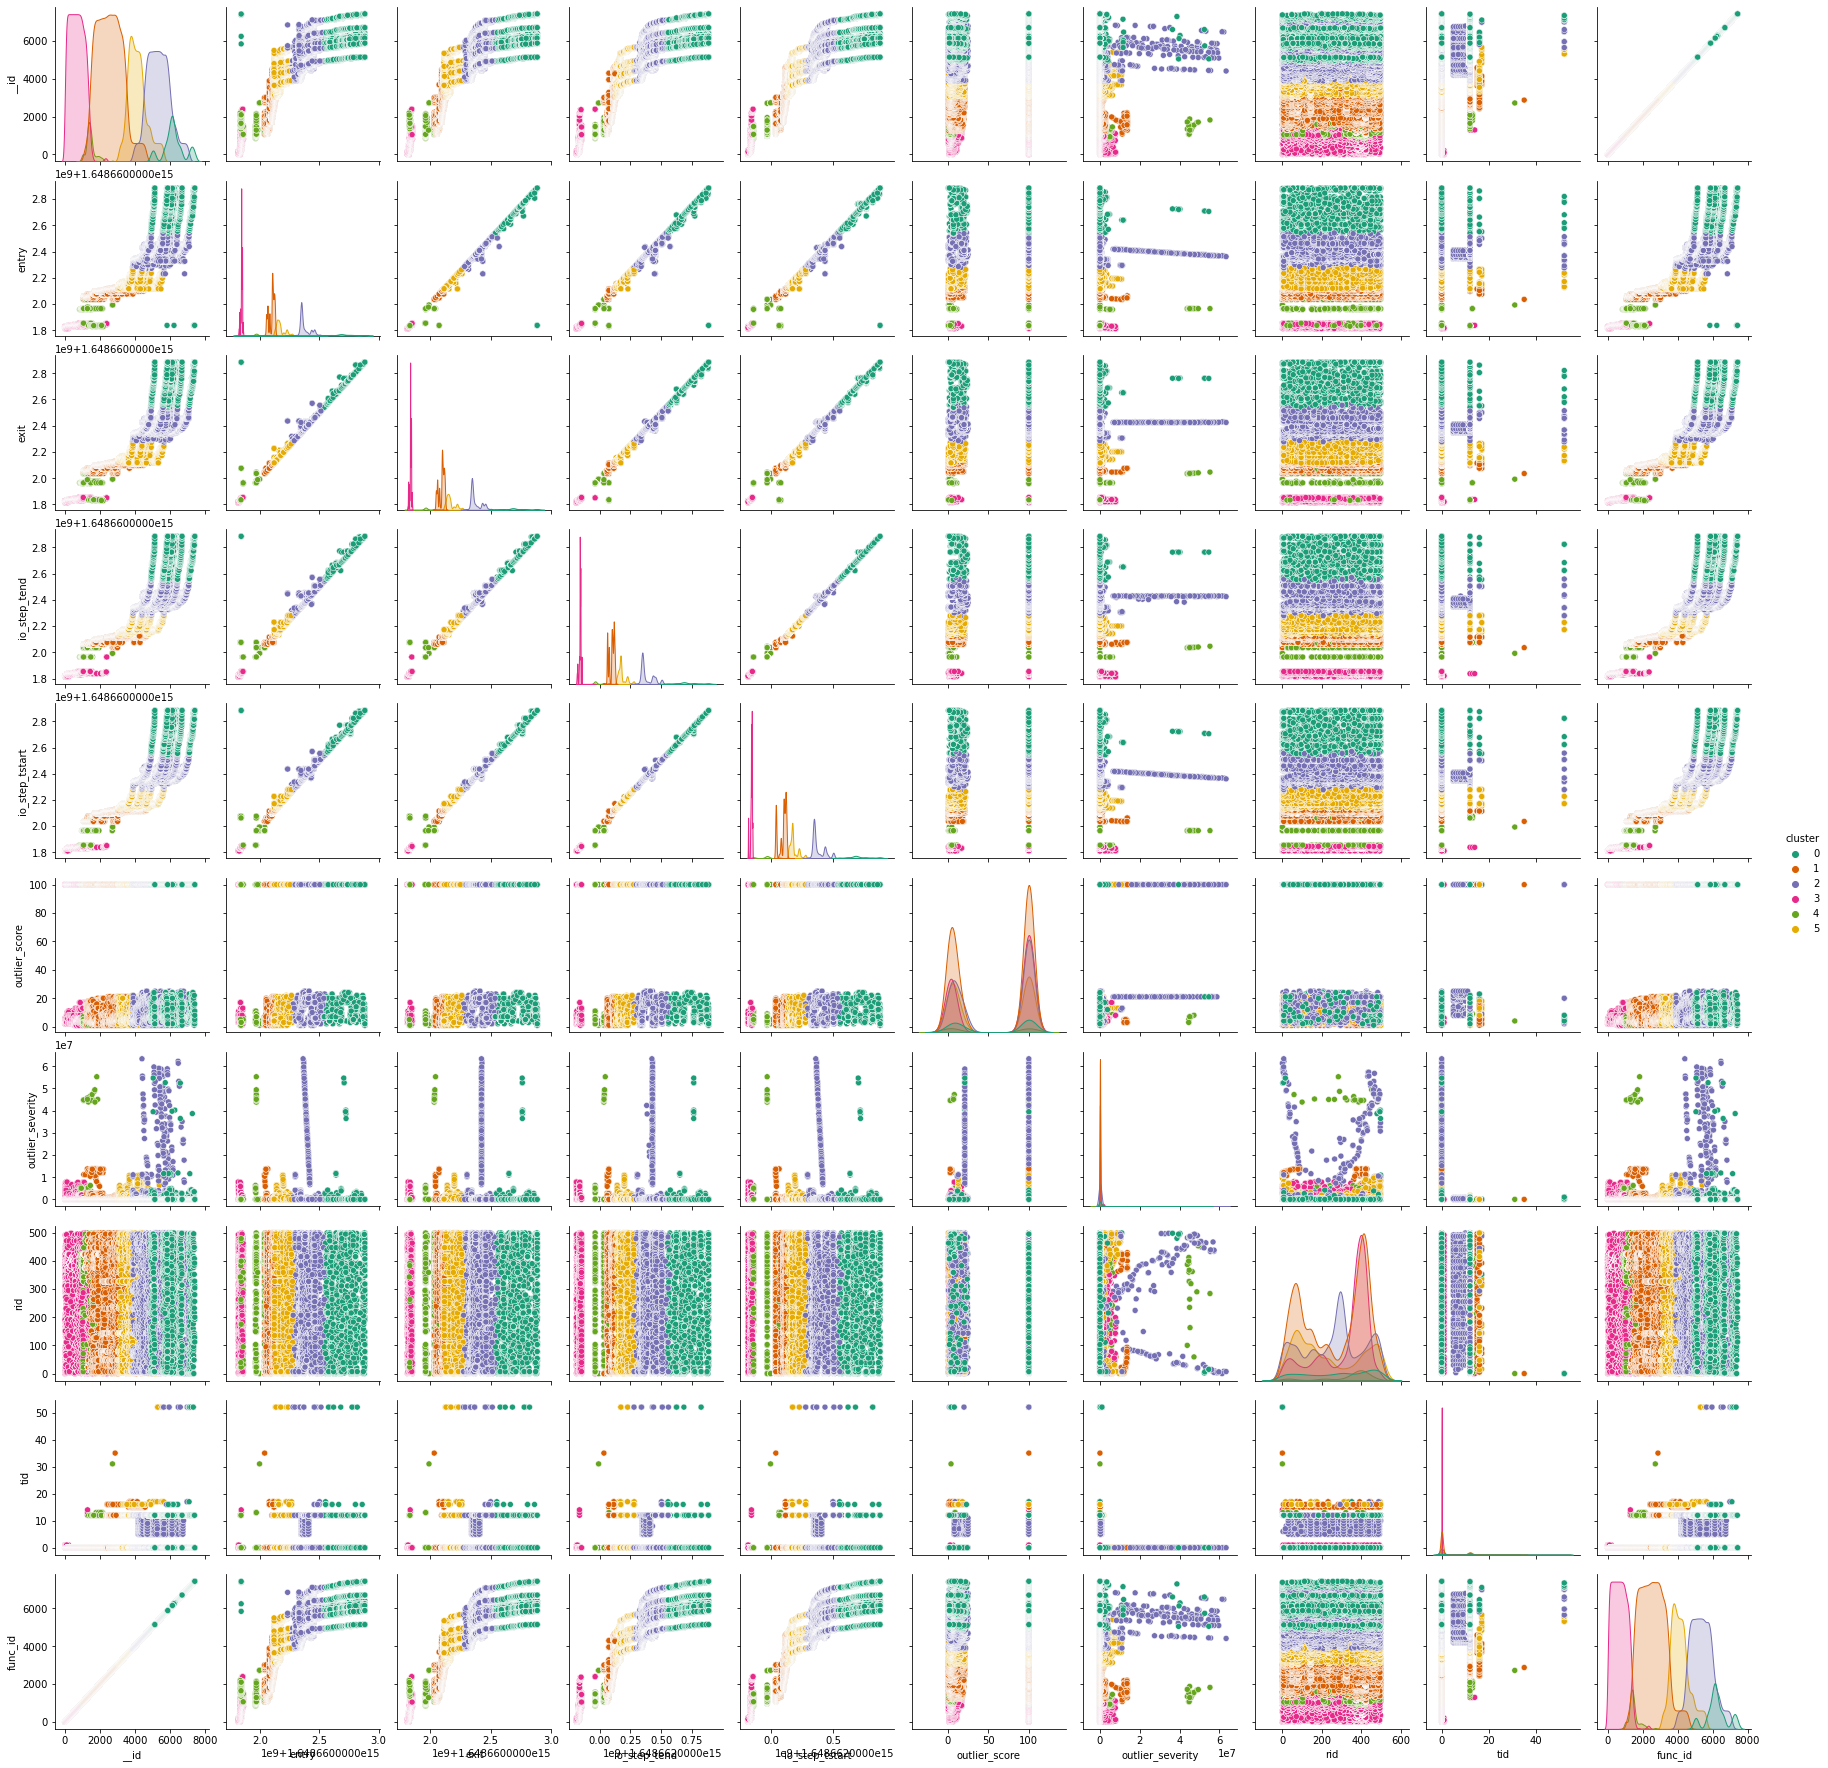

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df1,hue='cluster',palette='Dark2',diag_kind='kde')

In [70]:
for y in data_select1.columns:
    if(data_select1[y].dtype == np.float64):
        data_select1[y] = data_select1[y].astype(int)
data_select1.dtypes

entry                  int64
exit                   int64
io_step_tend           int64
io_step_tstart         int64
is_gpu_event        category
outlier_score          int32
outlier_severity       int64
rid                    int64
tid                    int64
hash_func           category
func                  object
func_id                int64
cluster                int16
dtype: object

In [71]:
data_select1['hash_func'] = data_select1['hash_func'].astype('category')
data_select1['is_gpu_event'] = data_select1['is_gpu_event'].astype('category')

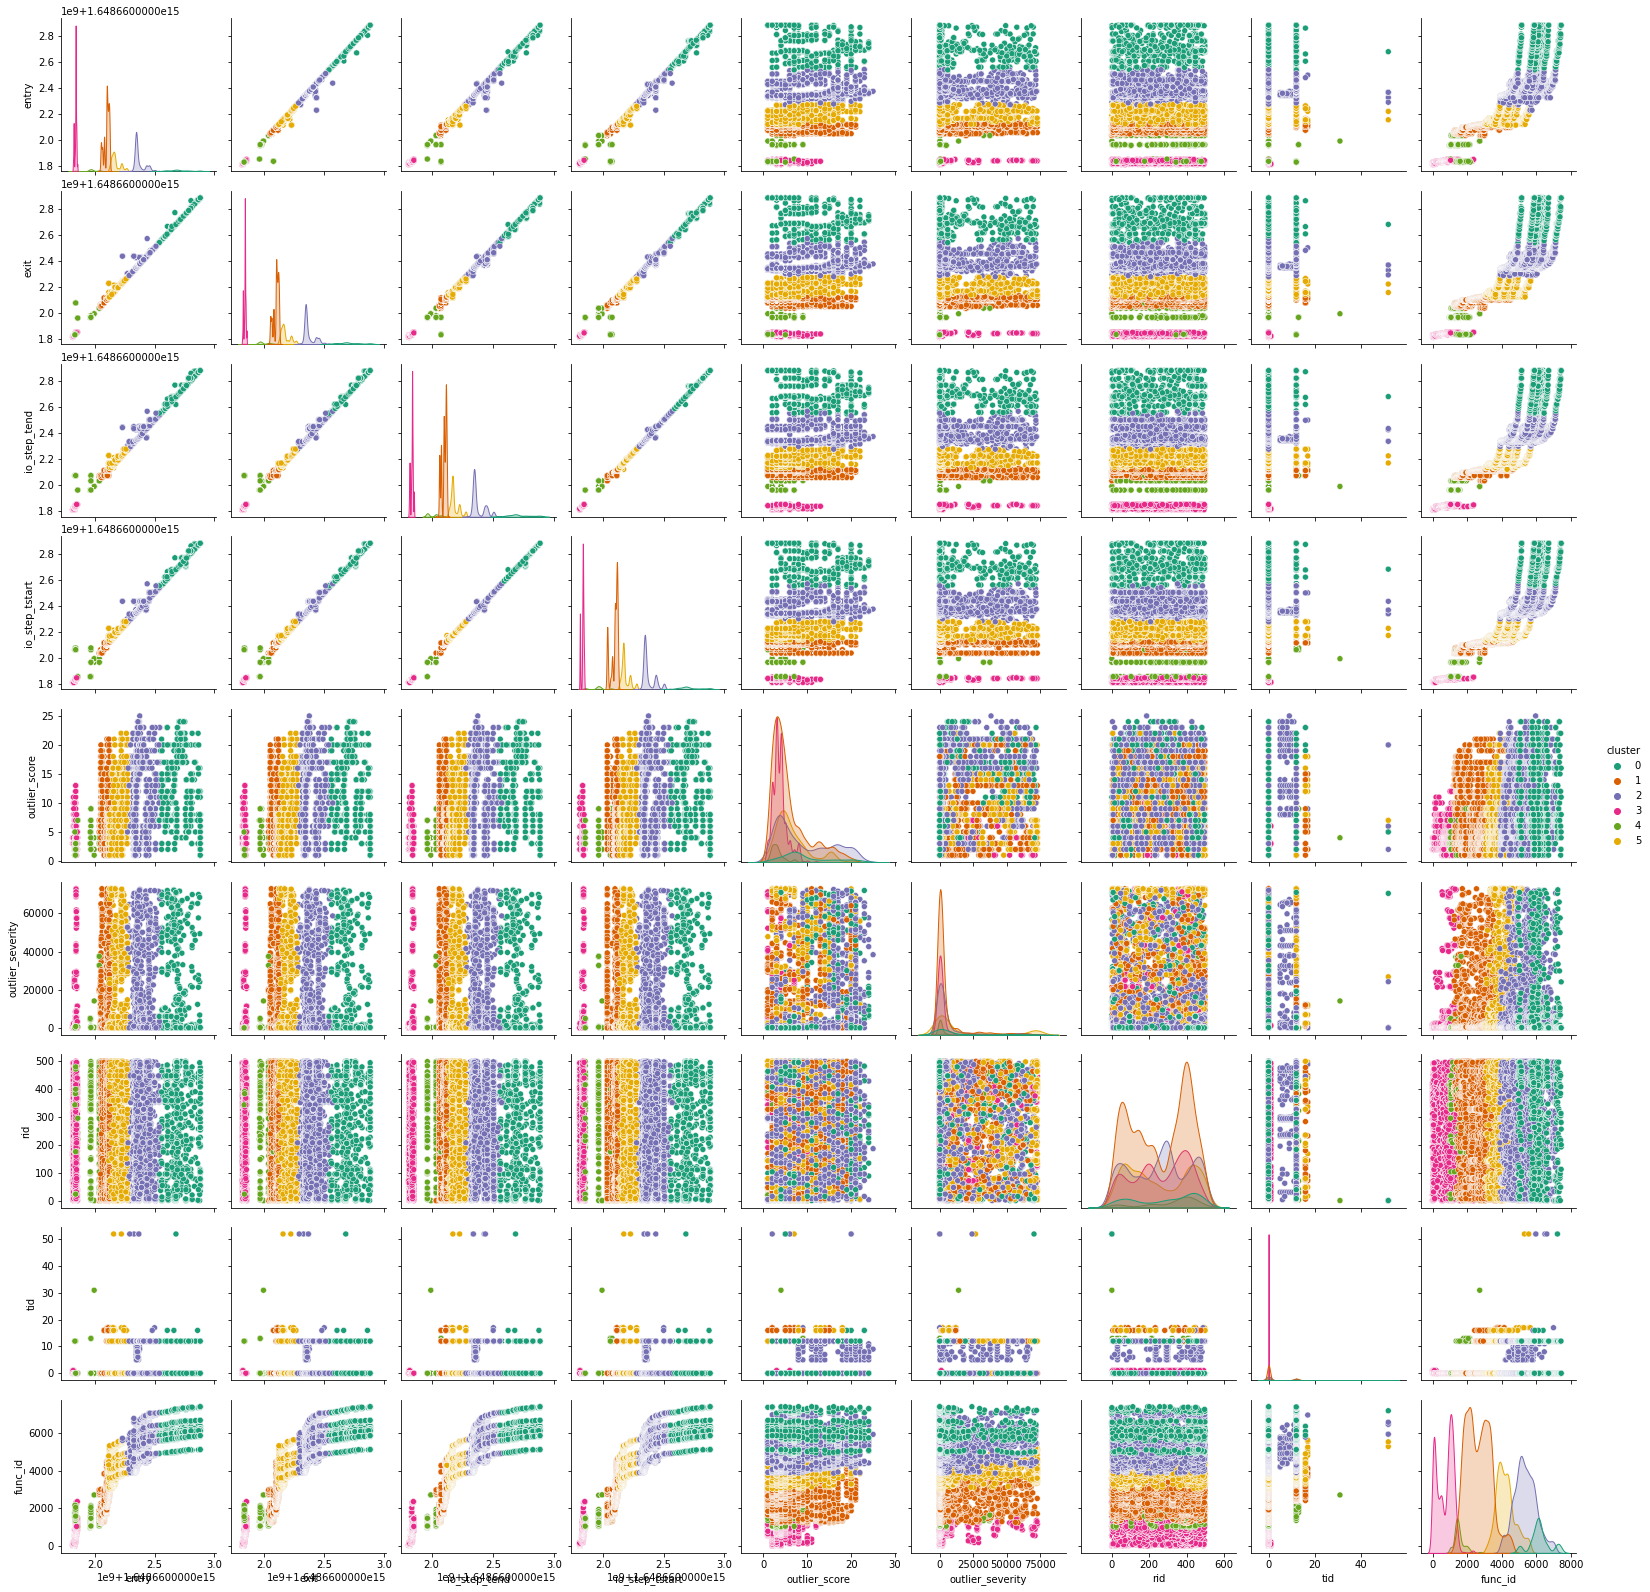

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(data_select1,hue='cluster',palette='Dark2',diag_kind='kde')